**GROUP 15 PROJECT PROPOSAL: ANALYSIS OF THE STATISTICS OF THE TOP 500 TENNIS PLAYERS**

***Exploratory Data Analysis of the Top 500 Tennis Players' Characteristics***

**INTRODUCTION:**

For our project, we will be using a .csv dataset that has been created by "The Ultimate Tennis Statistics". This dataset contains information on the top 500 male tennis players, including their age, height, country, handedness, backhand technique, current and best rank, seasons as a professional tennis player, in addition to a few other less relevant variables.

Tennis is a sport that is widely popular among players of all ages; most in which are striving to make it to the professional level of play. At this level, the top 500 men are known not only for the exceptional tennis playing skills, but also their wealth and prestige. This is why we have taken an interest in predicting a professional tennis player's total prize money based upon their age and best career ranking, using the k-nearest neighbors regression algorithm. 

***Predictive Question:***

Can we predict a professional male tennis player's total prize money based on their age and best career ranking?


**PRELIMINARY EXPLORATORY DATA ANALYSIS:**

In [1]:
#Import libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)

install.packages('kknn')
library(kknn)

install.packages("janitor")
library(janitor)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [2]:
tennis_data <- read_csv("https://raw.githubusercontent.com/Myralalala/group15/main/tennis_player_stats.csv")

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
#Cleaning the column names
tennis_data <- tennis_data |>
    clean_names()

tennis_data |> head()

x1,age,country,plays,wikipedia,current_rank,best_rank,name,backhand,prize_money,⋯,facebook,twitter,nicknames,grand_slams,davis_cups,web_site,team_cups,olympics,weeks_at_no_1,tour_finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,21 (29-05-1998),"Korea, Republic of",Right-handed,Wikipedia,236 (199),130 (10-04-2017),Duck Hee Lee,Two-handed,"$374,093",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,27 (21-10-1992),Australia,Right-handed,Wikipedia,183 (273),17 (11-01-2016),Bernard Tomic,Two-handed,"US$6,091,971",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,22 (11-02-1997),Poland,Right-handed,Wikipedia,31 (1398),31 (20-01-2020),Hubert Hurkacz,Two-handed,"$1,517,157",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


**Table 1.** First 6 rows of the initial Top 500 Male Tennis Player data set with cleaned column names. 

In [76]:
#Tidying and wrangling the data
tennis_tidy <- tennis_data |>
        separate(col = age,
                 into = c("age", "Birthdate"),
                 sep = " ") |>
        separate(col = best_rank,
                 into = c("best_rank", "best_rank_date"),
                 sep = " ") |> 
        separate(col = prize_money,
                 into = c("currency", "prize_money"),
                 sep = "\\$") |>
        separate(col = prize_money,  #This separate function removes the prize money annotation on highest all-time earning
                into = c("prize_money", "money_information"),
                sep = " ") |>
        mutate(age = as.double(age), best_rank = as.double(best_rank), prize_money = as.double(gsub(",", "", prize_money))) |>
        select(age, best_rank, prize_money) |>
        filter(prize_money != "NA") |> 
        mutate(best_rank = desc(best_rank))|>
        arrange(desc(prize_money))

head(tennis_tidy)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 20 rows [16, 96, 128, 142,
208, 212, 267, 274, 337, 363, 364, 381, 394, 414, 423, 435, 436, 461, 468,
497].”
Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 397 rows [2, 3, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, ...].”


age,best_rank,prize_money
<dbl>,<dbl>,<dbl>
32,-1,139144944
38,-1,129231891
33,-1,119601561
32,-1,61544007
34,-3,33790279
31,-3,27466016


**Table 2.** First 6 rows of the tidied Top 500 Male Tennis Player data set arranged in descending order.

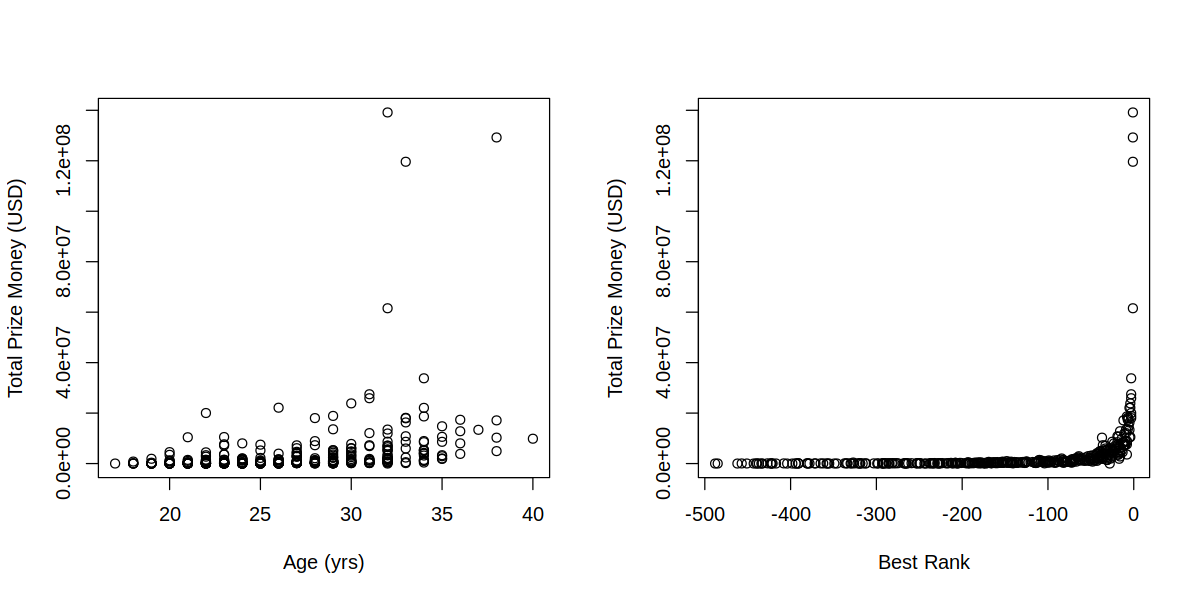

In [57]:
# Initial visualization of data
options(repr.plot.width = 10, repr.plot.height = 5)
par(mfrow = c(1, 2))
plot(tennis_tidy$age, tennis_tidy$prize_money, xlab = "Age (yrs)",
      ylab = "Total Prize Money (USD)")
plot(tennis_tidy$best_rank, tennis_tidy$prize_money, xlab = "Best Rank",
      ylab = "Total Prize Money (USD)")

**Figure 1.** Initial data visualization - two scatter plots of total prize money (USD) versus age (yrs) (left) and best rank (right). Demonstrates that there are six outliers for both predictive variables contributing to the data set. 

In [67]:
# Removing outliers 
tennis_data_tidy <- tennis_tidy |>
    filter(prize_money < 50000000, age != 17, age != 37)|>
    arrange(desc(prize_money))
head(tennis_data_tidy)

age,best_rank,prize_money
<dbl>,<dbl>,<dbl>
34,-3,33790279
31,-3,27466016
31,-3,25889586
30,-4,23846631
26,-4,22132368
34,-5,22072615


**Table 3.** First 6 rows of Top 500 Male Tennis Player data set arranged in descending order with outliers removed.

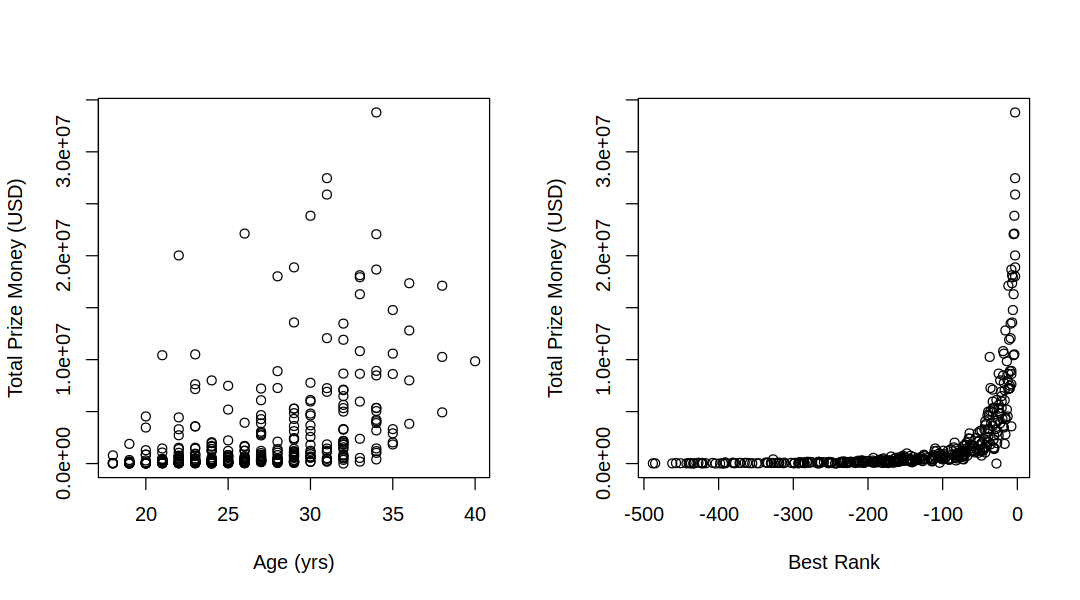

In [68]:
# Visualize data without outliers
par(mfrow = c(1, 2))
plot(tennis_data_tidy$age, tennis_data_tidy$prize_money, xlab = "Age (yrs)",
      ylab = "Total Prize Money (USD)")
plot(tennis_data_tidy$best_rank, tennis_data_tidy$prize_money, xlab = "Best Rank",
      ylab = "Total Prize Money (USD)")

**Figure 2.** Revised initial data visualization - two scatter plots of total prize money (USD) versus age (yrs) (left) and best rank (right) with six outliers removed. 

In [69]:
#Splitting the data into training data and testing data
set.seed(2023)

tennis_data_split <- initial_split(tennis_data_tidy, prop = 0.75, strata = prize_money)
tennis_data_train <- training(tennis_data_split)
tennis_data_test <- testing(tennis_data_split)

In [70]:
#Finding the mean prize money per age
average_age <- tennis_data_train |>
         group_by(age) |>
         summarise(average_prize_money = mean(prize_money, na.rm = TRUE))

#Finding the mean prize money per best rank
average_best_rank <- tennis_data_train |>
         group_by(best_rank) |>
         summarise(average_prize_money = mean(prize_money, na.rm = TRUE))

Warning message in geom_histogram(stat = "identity"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


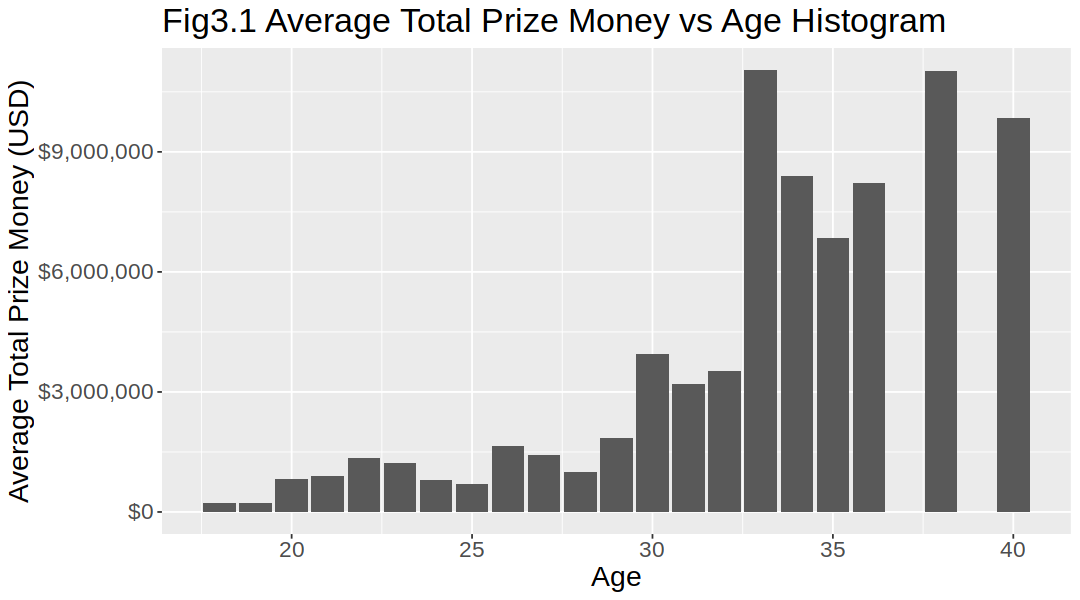

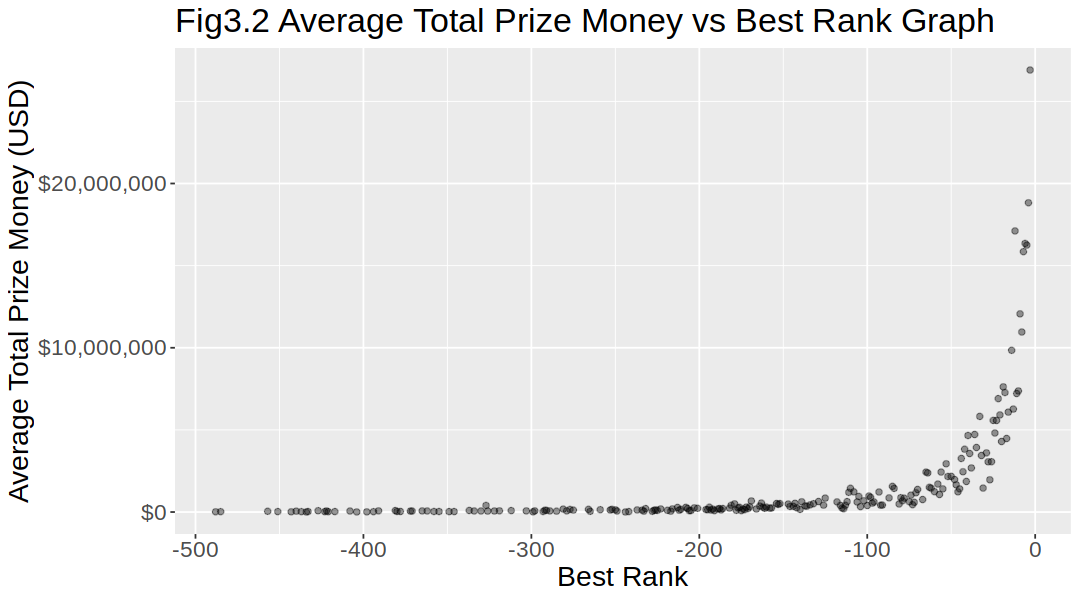

In [71]:
#Initial graphs of the predictor variables and the response variable we are predicting (Prize money)
options(repr.plot.width = 9, repr.plot.height = 5)

age_graph <- average_age |>
  ggplot(aes(x = age, y = average_prize_money)) +
    geom_histogram(stat = "identity") +
    labs(x = "Age", y = "Average Total Prize Money (USD)") +
    scale_y_continuous(labels = dollar_format()) +
    theme(text = element_text(size = 17)) + 
    ggtitle("Fig3.1 Average Total Prize Money vs Age Histogram")

best_rank_graph <- average_best_rank |>
  ggplot(aes(x = best_rank, y = average_prize_money)) +
    geom_point(alpha = 0.4) +
    labs(x = "Best Rank", y = "Average Total Prize Money (USD)") +
    scale_y_continuous(labels = dollar_format()) +
    theme(text = element_text(size = 17)) +
    ggtitle("Fig3.2 Average Total Prize Money vs Best Rank Graph")

age_graph
best_rank_graph

**Figure 3.1** Histogram of average total prize money (USD) versus age (yrs).

**Figure 3.2** Scatterplot of average total prize money (USD) versus best rank. 

**DATA ANALYSIS:**

In [72]:
# Finding best K for the KNN regression
set.seed(2023)

tennis_recipe <- recipe(prize_money ~ age + best_rank, data = tennis_data_train) |>
  step_scale(age, best_rank) |>
  step_center(age, best_rank)

tennis_specTune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

gridvals <- tibble(neighbors = seq(1, 200))

tennis_vfold <- vfold_cv(tennis_data_train, v = 5, strata = prize_money)

tennis_multi <- workflow() |>
  add_recipe(tennis_recipe) |>
  add_model(tennis_specTune) |>
  tune_grid(tennis_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse") |>
  filter(mean == min(mean))
tennis_multi

tennis_k <- tennis_multi |>
              pull(neighbors)

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
5,rmse,standard,2439391,5,258996.2,Preprocessor1_Model005


**Table 4.** Metrics for the minimized mean RMSPE value.

Using the training data we tune and assess our K value, in order to find the value that minimizes the RMSPE. Based on the table above, the value that minimizes the RMSPE is K = 5, meaning this is the optimal number of neighbors for our KNN regression model. 

In [73]:
# Evaluating using the test set
set.seed(2023)

tennis_spec <- nearest_neighbor(weight_func = "rectangular", 
                              neighbors = tennis_k) |>
  set_engine("kknn") |>
  set_mode("regression")

tennis_mult_fit <- workflow() |>
  add_recipe(tennis_recipe) |>
  add_model(tennis_spec) |>
  fit(data = tennis_data_train)

tennis_mult_preds <- tennis_mult_fit |>
  predict(tennis_data_test) |>
  bind_cols(tennis_data_test)

tennis_mult_metrics <- metrics(tennis_mult_preds, truth = prize_money, estimate = .pred) |>
                     filter(.metric == 'rmse')
tennis_mult_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,2935141


**Table 5.** Estimated test error metrics assessed by RMSPE.

Through the analysis and table above, we expect the error in our prediction to be roughly $2,935,141.

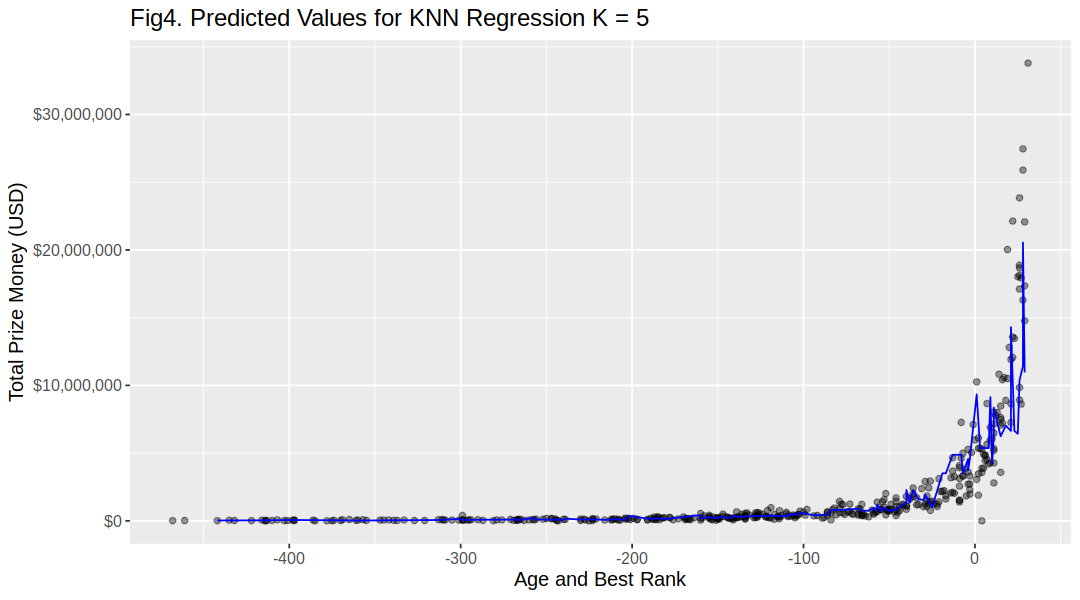

In [74]:
# Visualizing the regression model
options(repr.plot.width = 9, repr.plot.height = 5)

final_plot <- tennis_data_tidy |>
    ggplot(aes(x = age + best_rank, y = prize_money)) +
    geom_point(alpha = 0.4) +
    geom_line(data = tennis_mult_preds, 
            mapping = aes(x = age + best_rank, y = .pred), 
            color = "blue") +
    xlab("Age and Best Rank") +
    ylab("Total Prize Money (USD)") +
    scale_x_continuous() + 
    scale_y_continuous(labels = dollar_format()) +
    ggtitle(paste0("Fig4. Predicted Values for KNN Regression K = ", tennis_k)) + 
    theme(text = element_text(size = 12))
final_plot

**Figure 4.** Scatterplot of the predicted values of total prize money (blue line) for the final KNN regression model with age and best rank predictors. 

**METHODS:**

Using the "prize_money" column as our numerical, response variable, we used "age" and "best_rank" as our predictor factors to determine their impact and ability to predict a professional male tennis player's total prize money accumulated. We concluded on these predictor factors as we were able to see a relationship between age and best rank compared to the total prize money of individuals (Figures 1, 3.1 and 3.2), while we determined that the other variables had little relation. 

We cleaned the column names, such that they are usable within R. We also removed indicated date values from the age and best_rank columns, in addition to any dollar signs or "US" values in the prize money column; all done to allow the numeric values easier to work with in our KNN regression analysis and in creating graphs. Then, we mutated the best_rank column by adding a negative sign in front of the ranks so that rank 1 will be the largest value. Subsequently, this means both our predictor parameters will have a positive relation with the predicted variable which can increase the accuracy of our model. We also removed the outliers, which are prize_money of over $50,000,000 and ages 17 and 37 since there were only 1 player in each age group one of which had a very low relative prize money earning while the other had a high prize money winning relative to nearby ages. Also, them being the only data  from the data set, as these values were emphasized through the initial visualization of the data (Figure 1) and were seen to be influencing the data set to heavily. 

We randomly split the tidied data with 75% for training and 25% for testing using set.seed(2023). We then grouped the age and best rank variables before summarizing to calculate the mean total prize money. We decided a histogram was the best graph for the age variable as there is a smaller age range, allowing for a concise distribution graph among the ages (Figure 3.1). Overall, through Figures 3.1 and 3.2, we found that the total prize money increased as the ages generally increased and ranking was higher.

Finally, we used the KNN regression method in our data analysis code. Through the tuning of the k-nearest neighbours and the use of cross-validation, we found that the RMSPE was minimized with K = 5. As this value of K optimizes our regression model we proceeded with this value in our specification and tested the model against our test split data. For the presentation of the final regression through Figure 4, we decided to leave the x-axis scale set to the best rank variable's range to ensure effective visualization of the regression line and it's fit to the data. 

**DISCUSSION:**
- *needs to include:*
    - summarize what you found
    - discuss whether this is what you expected to find?
    - discuss what impact could such findings have?
    - discuss what future questions could this lead to?

(use section below for reference)

Our analysis aimed to predict a male professional tennis player's total prize money based on their age and best career ranking. According to the findings, higher rankings and older age are associated with greater prize money, which is consistent with the expectation that a successful career involves not only skill, but also experience, as reflected in age and rank. Figure 3.1 illustrates that, based on the data, people aged over 30 to 40 had the highest average total price money. Figure 3.2 also shows that tennis players with a rank under 100 have the highest average total price. 

According to our hypothesis, those with a higher best ranking would have won more tournaments, indicating that they would have earned more prize money. In addition, older players should also receive more prize money than younger players because they will have played in more tournaments. It is somewhat in line with expectations that higher ranking and older age are associated with greater earnings, reflecting success and experience. Based on the results of this study, talent scouts and athletes may be able to use such a model to estimate potential career earnings and establish realistic goals for their careers. Young, rising players may benefit from a predictive model like ours when making decisions regarding their career trajectory and training and development investments.

Although our model provides valuable insights, it also raises additional questions. What is the difference between these trends across different eras of tennis, given the evolution of the sport and its rewards? Do these patterns hold when variables such as playing style, injuries, and sponsorship are taken into account? This research could provide a holistic understanding of a player's potential earnings in the future.

Additionally, future research may investigate whether these findings apply to female players, the impact of a player's brand on earnings, and how rank affects marketability and sponsorship, which in turn affects prize money. Tennis players' financial success could be better understood by considering these factors.

Last but not least, the discussion of our findings must acknowledge the limitations of our data set and methodology. The k-nearest neighbors algorithm may fail to capture the complexity of factors affecting prize money, such as sponsorship, marketability, and the variability of prize pools in tournaments. Although the removal of outliers may have helped clean the data, it also means the model may not fully account for the high earning potential of top-ranked players, who are notable outliers.




**REFERENCES:**
- *required:*
    - At least 2 citations of literature relevant to the project (format is your choice, just be consistent across the references).

Hadlich, G. (2020, May 30). How Much Do Tennis Players Make? - The Ugly Truth. My Tennis HQ. https://mytennishq.com/how-much-do-tennis-players-make-the-ugly-truth/ 

Sackmann, J. (2015). Player Statistics for the Top 500 Male Tennis Players . https://www.ultimatetennisstatistics.com/. 

***TO BE DELETED!!***

***Expected Findings:***
We hypothesize that people with a higher best ranking implies that they won more tournaments, meaning they should earn more prize money. Moreover, those that are older should also have more prize money relative to those that are younger as they would have played in more tournaments.

***Finding Impacts:***
The findings from this analysis will provide insight into not only the longevity of a male professional tennis player's career (age), but also provide a comparable value for what an attainable amount of financial earnings is within the time frame of this career, based upon the best ranking one is able to achieve. Additionally, this regression model may be useful for talent identification for individuals scouting the upcoming male professional tennis players, as they can use new observations to predict athletes' potential prize earnings.

***Future Questions:***
* Do these findings align for the top 500 female professional tennis players?
* Does a players brand and marketability affect their prize earnings? Better yet, does one's best ranking affect their ability to receive marketing, and therefore, their total prize earnings?